<a href="https://colab.research.google.com/github/dhanush810/Rain-Prediction/blob/main/WeatherPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING MODULES / LIBRARIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

IMPORTING DATASET


In [ ]:
df=pd.read_csv("weathereport.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


DATA PREPROCESSING

In [ ]:
df.shape

(366, 22)

In [ ]:
df=df.drop(["Rainfall","RainToday"],axis=1)
print(df)

     MinTemp  MaxTemp  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
0        8.0     24.3          3.4       6.3          NW           30.0   
1       14.0     26.9          4.4       9.7         ENE           39.0   
2       13.7     23.4          5.8       3.3          NW           85.0   
3       13.3     15.5          7.2       9.1          NW           54.0   
4        7.6     16.1          5.6      10.6         SSE           50.0   
..       ...      ...          ...       ...         ...            ...   
361      9.0     30.7          7.6      12.1         NNW           76.0   
362      7.1     28.4         11.6      12.7           N           48.0   
363     12.5     19.9          8.4       5.3         ESE           43.0   
364     12.5     26.9          5.0       7.1          NW           46.0   
365     12.3     30.2          6.0      12.6          NW           78.0   

    WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           SW         NW    

In [ ]:
df.shape

(366, 20)

In [ ]:
df["RainTomorrow"].value_counts()#CHECKING BALANCED OR IMBALANCED

No     300
Yes     66
Name: RainTomorrow, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["WindGustDir","WindDir9am","WindDir3pm"]
for i in lst:
  df[i]=le.fit_transform(df[i])
df[lst]

,WindGustDir,WindDir9am,WindDir3pm
0,7,12,7
1,1,0,13
2,7,3,5
3,7,14,13
4,10,10,2
...,...,...,...
361,6,10,7
362,3,6,6
363,2,1,1
364,7,11,14


In [ ]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         3
WindGustDir      0
WindGustSpeed    2
WindDir9am       0
WindDir3pm       0
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

REPLACING NULL VALUES WITH MEAN VLAUES

In [ ]:
for i in df.columns:
  if df[i].isna().sum()>0:
    val=df[i].mean()
    df[i]=df[i].fillna(val)
df.isna().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
dtype: int64

EXPLORATORY DATA ANALYSIS

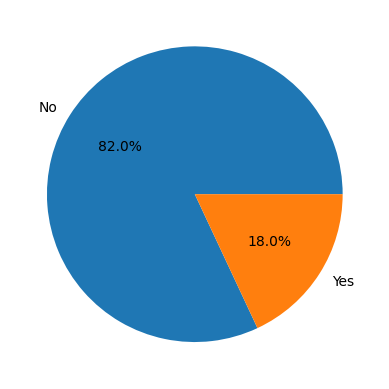

In [ ]:
#exploratary data analysis
rainfall_counts = df["RainTomorrow"].value_counts()
labels = ["No", "Yes"]  # Labels for the pie chart
sizes = rainfall_counts.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

In [ ]:
df.groupby("RainTomorrow").mean()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,,,
No,6.607333,20.396000,4.408667,8.536396,6.310000,38.318938,7.923333,7.536667,9.326370,17.810000,70.896667,41.623333,1020.742667,1017.932333,3.496667,3.540000,11.878000,19.196333,0.056667
Yes,10.257576,21.251515,5.036364,5.059233,6.787879,46.757576,7.166667,7.757576,11.131088,18.787879,77.212121,57.681818,1015.010606,1011.710606,5.681818,6.227273,14.542424,19.387879,7.663636


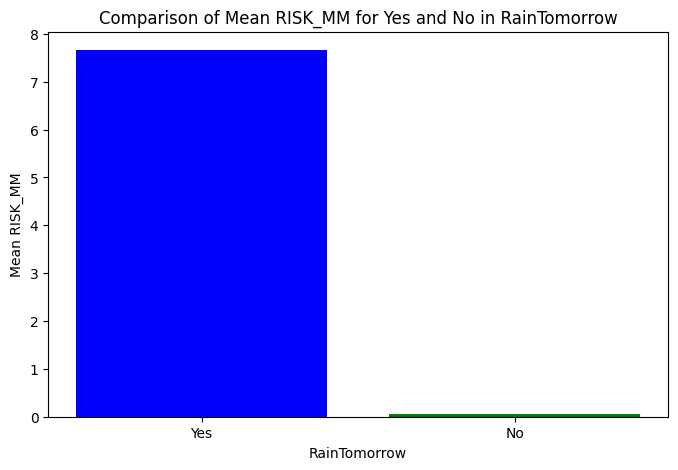

In [ ]:
yes_data = df[df['RainTomorrow'] == 'Yes']['RISK_MM']
no_data = df[df['RainTomorrow'] == 'No']['RISK_MM']

# Calculate the mean or median for each category
yes_mean = yes_data.mean()
no_mean = no_data.mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Yes', 'No'], [yes_mean, no_mean], color=['blue', 'green'])

# Add labels and title
plt.xlabel('RainTomorrow')
plt.ylabel('Mean RISK_MM')
plt.title('Comparison of Mean RISK_MM for Yes and No in RainTomorrow')

# Show the plot
plt.show()

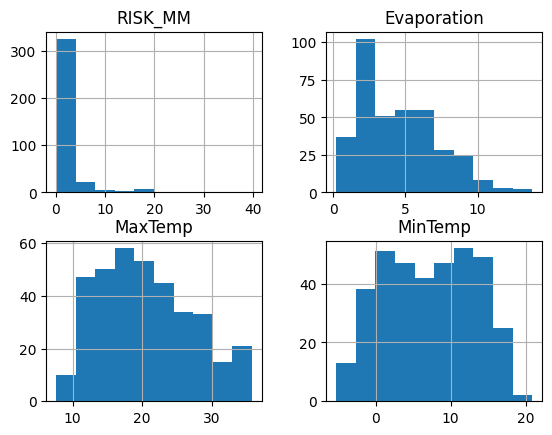

In [ ]:
viz = df[['RISK_MM','Evaporation','MaxTemp','MinTemp']]
viz.hist()
plt.show()


DATA REDUCING AND SPILITTING

In [ ]:
df["RainTomorrow"]=df["RainTomorrow"].map({"Yes":1,"No":0})
df["RainTomorrow"]

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: int64

In [ ]:
df.drop(["Temp9am", "Pressure9am"], axis=1, inplace=True)
df

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1015.0,7,7,23.6,3.6,1
1,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1008.4,5,3,25.7,3.6,1
2,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1007.2,8,7,20.2,39.8,1
3,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1007.0,2,7,14.1,2.8,1
4,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.5,7,7,15.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1010.8,1,3,30.0,0.0,0
362,7.1,28.4,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1016.9,0,1,28.2,0.0,0
363,12.5,19.9,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1022.8,3,2,18.3,0.0,0
364,12.5,26.9,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1016.2,6,7,25.9,0.0,0


SPILITING TEST AND TRAIN SET

In [ ]:
X = df.drop(["RainTomorrow"],axis=1)
y = df["RainTomorrow"]
print(X)
print(y)

     MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0        8.0     24.3          3.4       6.3            7           30.0   
1       14.0     26.9          4.4       9.7            1           39.0   
2       13.7     23.4          5.8       3.3            7           85.0   
3       13.3     15.5          7.2       9.1            7           54.0   
4        7.6     16.1          5.6      10.6           10           50.0   
..       ...      ...          ...       ...          ...            ...   
361      9.0     30.7          7.6      12.1            6           76.0   
362      7.1     28.4         11.6      12.7            3           48.0   
363     12.5     19.9          8.4       5.3            2           43.0   
364     12.5     26.9          5.0       7.1            7           46.0   
365     12.3     30.2          6.0      12.6            7           78.0   

     WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0            12

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [ ]:
X_train.shape

(256, 17)

In [ ]:
ros=RandomOverSampler(sampling_strategy="minority",random_state=22)
X,Y=ros.fit_resample(X_train,y_train)

FEATURE SCALING

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)

ALGORITHM SELECTION

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Results for {rf.__class__.__name__}:')
print(classification_report(y_test, y_pred))

Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        90
           1       1.00      0.25      0.40        20

    accuracy                           0.86       110
   macro avg       0.93      0.62      0.66       110
weighted avg       0.88      0.86      0.83       110



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'Results for {dt.__class__.__name__}:')
print(classification_report(y_test, y_pred))

Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        90
           1       1.00      0.25      0.40        20

    accuracy                           0.86       110
   macro avg       0.93      0.62      0.66       110
weighted avg       0.88      0.86      0.83       110



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Results for {lr.__class__.__name__}:')
print(classification_report(y_test, y_pred))

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.75      0.86        20

    accuracy                           0.95       110
   macro avg       0.97      0.88      0.92       110
weighted avg       0.96      0.95      0.95       110



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type L1 ABSOLUTE DEVIATION L2 LESAST SQUARES
    'solver': ['liblinear', 'saga']  # Solver for optimization
}


grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9545454545454546
Confusion Matrix:
 [[90  0]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.75      0.86        20

    accuracy                           0.95       110
   macro avg       0.97      0.88      0.92       110
weighted avg       0.96      0.95      0.95       110



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LOGISTIC ALGORITHM GIVES THE BEST SOLUTION


PREDICTING THE RESULT

In [ ]:
input_data = (7.6, 16.1, 5.6, 10.6, 10, 50.0, 10, 2, 20.0, 28, 68, 49, 1018.5, 7, 7, 15.4, 0.0)
input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1, -1)

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp3pm', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
prediction=lr.predict(input_data_reshape)
if prediction ==1:
  print("ITS A RAINY DAYYYY!!!!!!")

else:
  print("ITS A SUNNY DAYYYY!!!!!!")

ITS A SUNNY DAYYYY!!!!!!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
